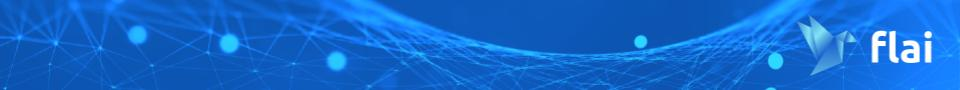

# **Aula 10 - DDS4 - Combinação de Modelos**

---
## **Importação e Preparação dos Dados**

In [ ]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

In [ ]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

---
## **Upgrade na Técnica de Validação: _K-FOLD REPETIDO_**

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

validacao = RepeatedKFold(n_splits = 10, n_repeats = 5)

kf = KFold(n_splits = 10, shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# Regressão Logistica
modelo = LogisticRegression() 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.9321445404556168

In [ ]:
# KNN
modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.9600751879699247

In [ ]:
# Árvore de Decisão
modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.9629312086185614

---
## **Combinação via Votos HARD**

In [ ]:
#Combinação Hard

In [ ]:
# Combinação por votos 'Hard'
from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]
modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.9638357086746717

KeyboardInterrupt: ignored

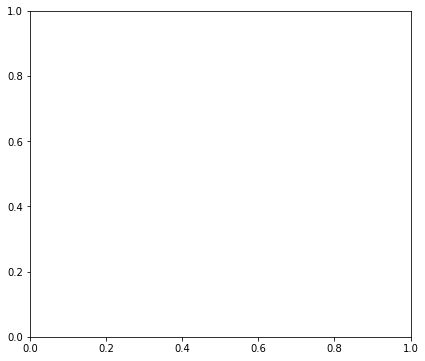

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25) 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Combinação de Modelos SOFT**

In [ ]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]
modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.9650218830658736

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


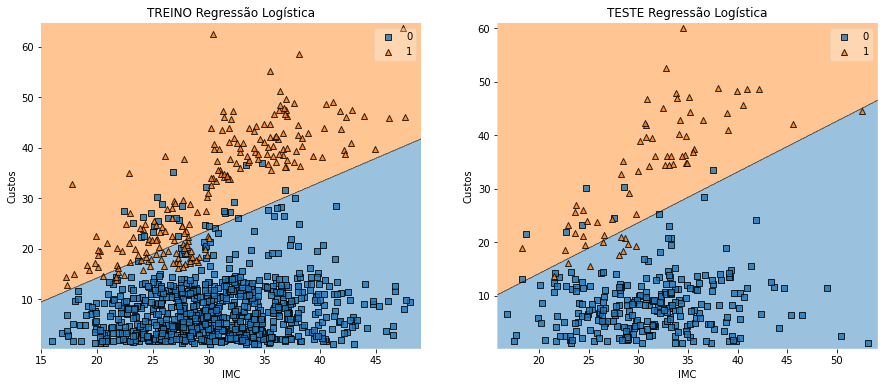

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25) 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Bagging de Modelos**

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base) 
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9327236000448883

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


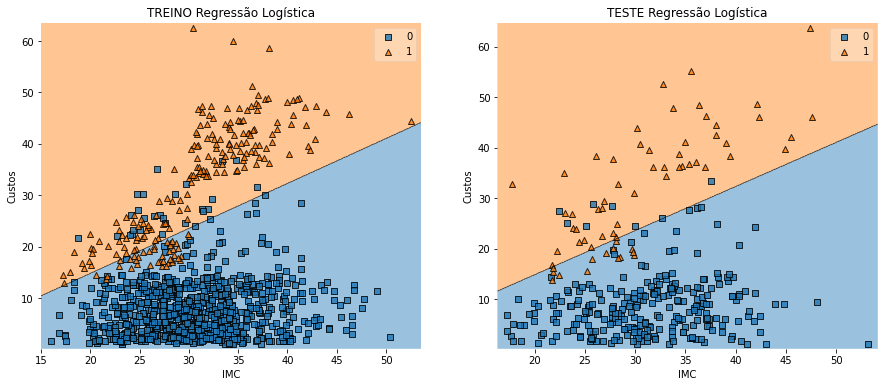

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.9633789698125912

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **Exercícios Propostos**

- Use todo o seu conhecimento adquirido até então para encontrar o modelo com a melhor acurácia para esses dados!

In [ ]:
modelo = LogisticRegression()
modelo.fit(X, y)
preditos = modelo.predict(X)
preditos

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(y, preditos)
mc.flatten()

array([1029,   35,   54,  220])

In [ ]:
vn, fp, fn, vp = mc.flatten()

print('VP: {}'.format(vp))
print('VN: {}'.format(vn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\nTOTAL: {}'.format(fn+fp+vn+vp))

VP: 220
VN: 1029
FP: 35
FN: 54

TOTAL: 1338


In [ ]:
def MetricasClassBinaria(observado, predito, custo = None):
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()
 
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp) 
    efi = (sen + esp)/2
 
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp)) 
    print('                Eficiência: {:.4f}'.format(efi))
  
    metricas = { 'acurácia': acc, 'sensibilidade': sen, 
                'especificidade': esp, 'eficiência': efi}
  
    return metricas

In [ ]:
modelo1 = MetricasClassBinaria(y, preditos)

                  Acurácia: 0.9335
             Sensibilidade: 0.8029
            Especificidade: 0.9671
                Eficiência: 0.8850


In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 25)
modelo.fit(X, y)
preditos = modelo.predict(X)
preditos

modelo2 = MetricasClassBinaria(y, preditos)

                  Acurácia: 0.9649
             Sensibilidade: 0.9781
            Especificidade: 0.9615
                Eficiência: 0.9698


In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(X, y)
preditos = modelo.predict(X)
preditos

modelo3 = MetricasClassBinaria(y, preditos)

                  Acurácia: 0.9686
             Sensibilidade: 0.9854
            Especificidade: 0.9643
                Eficiência: 0.9748


In [ ]:
resultados0 = {'Regressão Logística': list(modelo1.values()),
              '25KNN-Vizinhos + Próximos': list(modelo2.values()),
              'Árvore de Decisão': list(modelo3.values())}
              
resultados = pd.DataFrame(resultados0, index = modelo1.keys()).T
resultados

,acurácia,sensibilidade,especificidade,eficiência
Regressão Logística,0.933483,0.802920,0.967105,0.885012
25KNN-Vizinhos + Próximos,0.964873,0.978102,0.961466,0.969784
Árvore de Decisão,0.968610,0.985401,0.964286,0.974844


In [ ]:
from google.colab.data_table import DataTable
DataTable(resultados.round(3))

,acurácia,sensibilidade,especificidade,eficiência
Regressão Logística,0.933,0.803,0.967,0.885
25KNN-Vizinhos + Próximos,0.965,0.978,0.961,0.970
Árvore de Decisão,0.969,0.985,0.964,0.975


 ## Conclusões

 Com base nos algoritimos utilizados, Árvore de decisão por 0.04% houve uma  melhor acurácia dentro os modelos, podemos entender que a eficiência do modelo foi de 97,5%.
 

---
**_#itstimetoflai_** 